**--ABSTRACT--**

El dataset seleccionado contiene información sobre canciones populares en Spotify, incluyendo características de las canciones y su popularidad en diferentes plataformas de streaming.

A través de este dataset, se busca explorar la relación entre las características de las canciones y su popularidad en términos de streams, así como analizar la distribución de streams entre los artistas y meses más populares.
Para ello, se plantean tres preguntas de investigación:
1. ¿Cómo se distribuyen los streams entre los 10 artistas más populares?
2. ¿Cuál es la relación entre el tempo de la canción (BPM) y la cantidad de streams en los 10 meses con más streams?
3. ¿Cómo afectan las características de la canción (como la danceabilidad, energía y valencia) al número de streams en las 10 canciones más populares?

Para responder a estas preguntas, se realizarán gráficos que permitan visualizar la relación entre las variables y se analizarán los resultados obtenidos.

El objetivo es identificar patrones y tendencias que puedan ayudar a comprender mejor los factores que influyen en la popularidad de las canciones en Spotify y otras plataformas de streaming.
Se espera que los resultados obtenidos contribuyan a la comprensión de la industria musical y el comportamiento de los usuarios en plataformas de streaming, así como a la identificación de estrategias para aumentar la popularidad de las canciones en estos entornos.

Finalmente, se espera que este análisis proporcione información relevante para artistas, productores y otros profesionales de la industria musical que buscan comprender mejor el mercado y mejorar su presencia en plataformas de streaming como Spotify.


**Preguntas e Hipótesis**

1. ¿Cómo se distribuyen los streams entre los 10 artistas más populares?
 Hipótesis: Los artistas más populares (en términos de streams) tienden a tener significativamente más streams que los menos populares.


2. ¿Cuál es la relación entre el tempo de la canción (BPM) y la cantidad de streams en los 10 meses con más streams? Hipótesis: En los meses con más streams, las canciones con tempos más altos tienden a ser más populares.


3. ¿Cómo afectan las características de la canción (como la danceabilidad, energía y valencia) al número de streams en las 10 canciones más populares? Hipótesis: Las canciones con mayor danceabilidad y energía están entre las más populares (en términos de streams).

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

canciones_spotify = pd.read_csv("/content/drive/MyDrive/Coderhouse/Data Science/Trabajo Final/Popular_Spotify_Songs.csv", encoding='latin1')
print(canciones_spotify.columns)


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [7]:
#Convertión de la columna 'streams' a numérico
canciones_spotify['streams'] = pd.to_numeric(canciones_spotify['streams'], errors='coerce')

#Filtro de las filas con valores NaN en 'streams'
canciones_spotify = canciones_spotify.dropna(subset=['streams'])

# Selección los 10 artistas con más streams
top_10_artists = canciones_spotify.groupby('artist(s)_name')['streams'].sum().nlargest(10).reset_index()

<ipython-input-8-c0fd46729c6d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='streams', y='artist(s)_name', data=top_10_artists, palette='viridis')


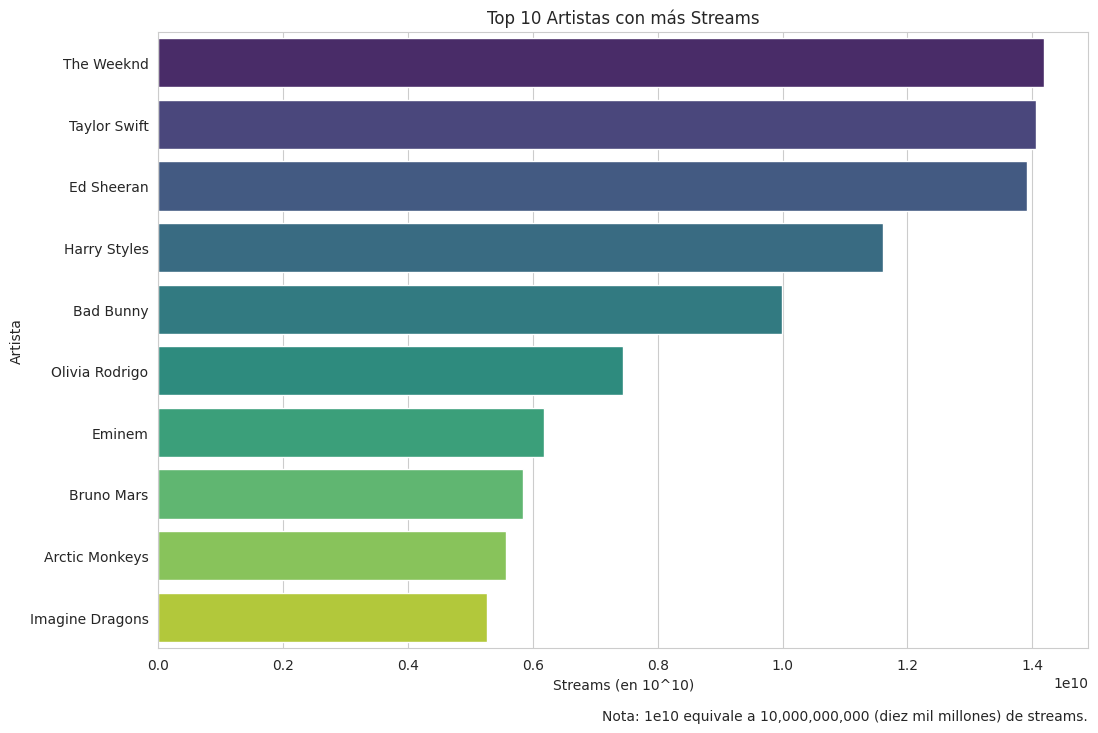

In [8]:
# Gráfico 1 de barras

# Configuración del estilo de gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='streams', y='artist(s)_name', data=top_10_artists, palette='viridis')
plt.title('Top 10 Artistas con más Streams')
plt.xlabel('Streams (en 10^10)')
plt.ylabel('Artista')

# Texto explicativo de la métrica tomada
plt.figtext(0.9, 0.02, 'Nota: 1e10 equivale a 10,000,000,000 (diez mil millones) de streams.', ha='right', fontsize=10)
plt.show()

El gráfico de barras muestra la cantidad de streams acumulados para los 10 artistas con más streams en el dataset. A su vez,
se incluye una nota explicativa que indica que 1e10 equivale a 10,000,000,000 (diez mil millones) de streams.
La hipótesis planteada en la actividad es que los artistas más populares (en términos de streams) tienden a tener significativamente más streams que los menos populares.

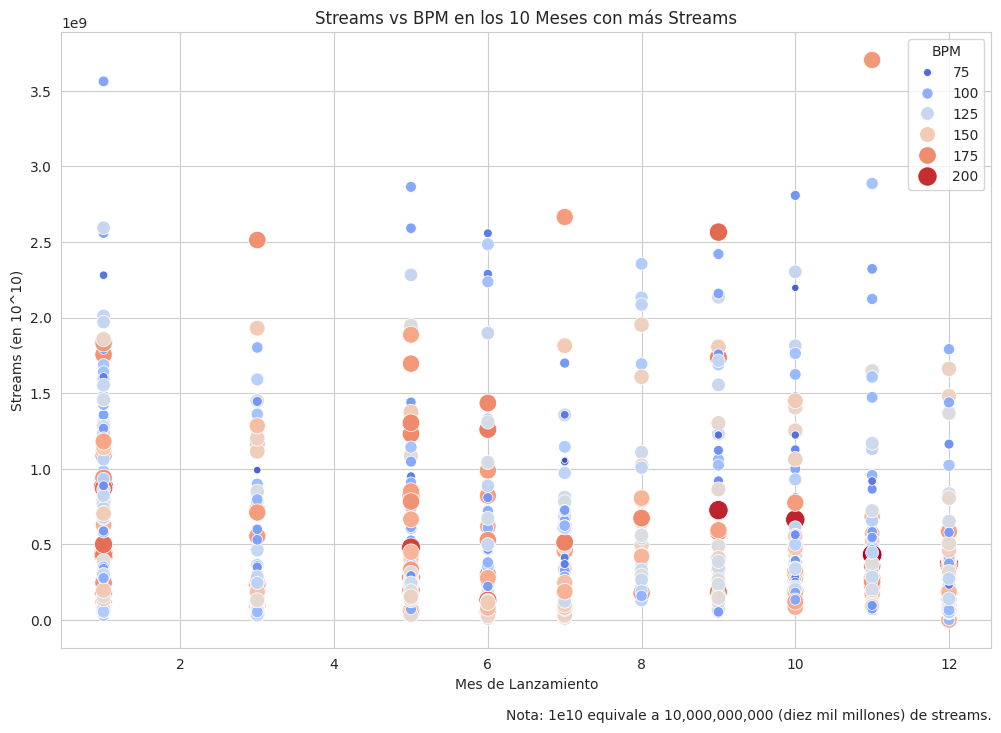

In [9]:
#Gráfico de dispersión entre 'BPM' y 'streams' para los 10 meses con más streams
# Seleccionar los 10 meses con más streams
top_10_months = canciones_spotify.groupby('released_month')['streams'].sum().nlargest(10).reset_index()

# Filtrar el dataset para incluir solo estos meses
filtered_data = canciones_spotify[canciones_spotify['released_month'].isin(top_10_months['released_month'])]

plt.figure(figsize=(12, 8))

# Gráfico 2 de dispersión
ax = sns.scatterplot(x='released_month', y='streams', size='bpm', hue='bpm', data=filtered_data, palette='coolwarm', sizes=(20, 200))
plt.title('Streams vs BPM en los 10 Meses con más Streams')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Streams (en 10^10)')
plt.legend(title='BPM')

# Agregar texto explicativo
plt.figtext(0.9, 0.02, 'Nota: 1e10 equivale a 10,000,000,000 (diez mil millones) de streams.', ha='right', fontsize=10)

plt.show()

El gráfico de dispersión muestra la relación entre el tempo de la canción (BPM) y la cantidad de streams en los 10 meses con más streams en el dataset.
La hipótesis planteada en la actividad es que en los meses con más streams, las canciones con tempos más altos tienden a ser más populares.
La escala de colores indica el valor del tempo (BPM) de las canciones, y el tamaño de los puntos está relacionado con el tempo (a mayor tamaño, mayor BPM).
La leyenda del gráfico muestra la relación entre el tamaño de los puntos y el valor del tempo.
La métrica de streams se explica en la nota al pie del gráfico.

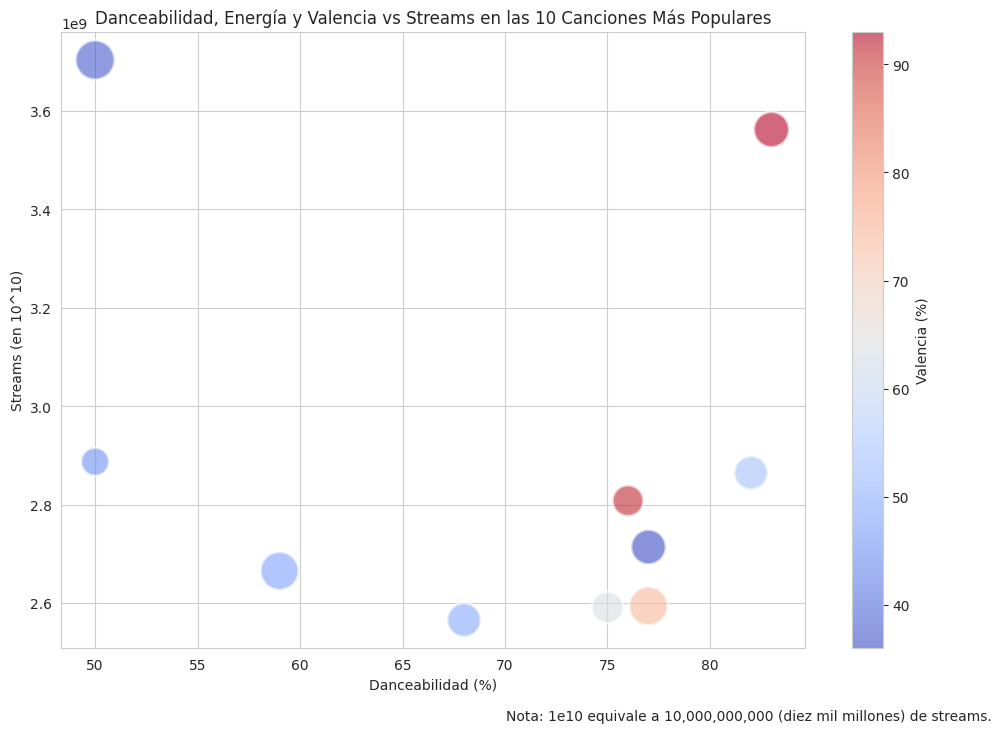

In [10]:
#Gráfico 3 de Burbujas

#Conversión de columnas a numérico
canciones_spotify['danceability_%'] = pd.to_numeric(canciones_spotify['danceability_%'], errors='coerce')
canciones_spotify['energy_%'] = pd.to_numeric(canciones_spotify['energy_%'], errors='coerce')
canciones_spotify['valence_%'] = pd.to_numeric(canciones_spotify['valence_%'], errors='coerce')
canciones_spotify = canciones_spotify.dropna(subset=['streams', 'danceability_%', 'energy_%', 'valence_%'])

# Seleccionar las 10 canciones más populares por streams
top_10_songs = canciones_spotify.nlargest(10, 'streams')

plt.figure(figsize=(12, 8))

# Crear gráfico de burbujas
bubble_chart = plt.scatter(
    x=top_10_songs['danceability_%'],
    y=top_10_songs['streams'],
    s=top_10_songs['energy_%'] * 10,  # Ajustar el tamaño de la burbuja
    c=top_10_songs['valence_%'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors="w",
    linewidth=2
)

plt.colorbar(label='Valencia (%)')
plt.title('Danceabilidad, Energía y Valencia vs Streams en las 10 Canciones Más Populares')
plt.xlabel('Danceabilidad (%)')
plt.ylabel('Streams (en 10^10)')

# Agregar texto explicativo
plt.figtext(0.9, 0.02, 'Nota: 1e10 equivale a 10,000,000,000 (diez mil millones) de streams.', ha='right', fontsize=10)
plt.show()

El gráfico de burbujas muestra la relación entre la danceabilidad, energía y valencia de las 10 canciones más populares (en términos de streams) en el dataset.
La hipótesis planteada en la actividad es que las canciones con mayor danceabilidad y energía están entre las más populares.
En el gráfico, el eje x representa la danceabilidad de las canciones, el eje y representa la cantidad de streams y el tamaño de las burbujas está relacionado con la energía de las canciones.
Adicionalmente, el color de las burbujas indica el valor de la valencia de las canciones (de frío a cálido).
La leyenda del gráfico muestra la relación entre el color de las burbujas y el valor de la valencia.
La métrica de streams se explica en la nota al pie del gráfico.

In [11]:
#Identificar valores perdidos en el dataset
missing_values = canciones_spotify.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


En el dataset, se identifican valores perdidos en las columnas 'in_shazam_charts' y 'key'.
Estos valores nulos pueden deberse a la falta de información en el dataset original o a errores en la recolección de datos.